In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define paths
images_dir = 'path/to/your/images'

# Function to load and preprocess images
def load_images( num_samples, num_vars, img_shape=(64, 64)):
    X = np.zeros((num_samples, img_shape[0], img_shape[1], num_vars), dtype=np.float32)
    y = np.zeros((num_samples, img_shape[0], img_shape[1], 1), dtype=np.float32)  # Single channel for target
    for i in range(num_samples):
        # Load target image
        target_img_path = os.path.join( f'burned_area_{i}.png')
        if os.path.exists(target_img_path):
            target_img = Image.open(target_img_path).convert('L')  # Convert to grayscale
            target_img = target_img.resize(img_shape)
            target_img_array = np.array(target_img) / 255.0  # Normalize the pixel values
            y[i, :, :, 0] = target_img_array
        
        # Load input variable images and stack them
        stacked_img = np.zeros((img_shape[0], img_shape[1], num_vars), dtype=np.float32)
        for j in range(num_vars):  
            img_path = os.path.join( f'sample_{i}_var{j}.png')  # Adjusting the index
            if os.path.exists(img_path):
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize(img_shape)
                img_array = np.array(img) / 255.0  # Normalize the pixel values
                stacked_img[:, :, j] = img_array
        
        X[i,:,:,:] = stacked_img
    
    return X, y

# Define number of samples and variables
num_samples = 228  # Replace with the actual number of samples
num_vars = 14

# Load images
X, y = load_images( num_samples, num_vars, img_shape=(64, 64))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define paths
images_dir = 'path/to/your/images'

# Function to load and preprocess images
def load_images(num_samples, num_vars, img_shape=(128, 128)):
    X = np.zeros((num_samples, img_shape[0], img_shape[1], num_vars), dtype=np.float32)
    y = np.zeros((num_samples, img_shape[0], img_shape[1], 1), dtype=np.float32)  # Single channel for target
    for i in range(num_samples):
        # Load target image
        target_img_path = os.path.join(f'burned_area_{i}.png')
        if os.path.exists(target_img_path):
            target_img = Image.open(target_img_path).convert('L')  # Convert to grayscale
            target_img = target_img.resize(img_shape)
            target_img_array = np.array(target_img) / 255.0  # Normalize the pixel values
            y[i, :, :, 0] = target_img_array
        
        # Load input variable images and stack them
        stacked_img = np.zeros((img_shape[0], img_shape[1], num_vars), dtype=np.float32)
        for j in range(num_vars):  
            img_path = os.path.join( f'sample_{i}_var{j}.png')  # Adjusting the index
            if os.path.exists(img_path):
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize(img_shape)
                img_array = np.array(img) / 255.0  # Normalize the pixel values
                stacked_img[:, :, j] = img_array
        
        X[i, :, :, :] = stacked_img
    
    return X, y

# Define number of samples and variables
num_samples = 228  # Replace with the actual number of samples
num_vars = 14

# Load images
X, y = load_images(num_samples, num_vars, img_shape=(128, 128))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose, UpSampling2D, InputLayer
from tensorflow.keras.optimizers import Adam

def build_minimal_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(128, 128, 14)))

    # First Conv Layer
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))  # 64x64

    # Second Conv Layer
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))  # 32x32

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(32 * 32 * 32, activation='relu'))
    model.add(Reshape((32, 32, 32)))

    # Deconvolution Layers
    model.add(UpSampling2D((2, 2)))  # 64x64
    model.add(Conv2DTranspose(16, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))  # 128x128
    model.add(Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same'))

    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    return model

model = build_minimal_model()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 16)   │         2,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32768)          │ 1,073,774,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 128, 128, 1)    │           145 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073,786,033 (4.00 GB)

 Trainable params: 1,073,786,033 (4.00 GB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), batch_size=16)


Epoch 1/2


In [29]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0010 - mae: 0.0096
Test Loss: 0.0010240065166726708, Test MAE: 0.009570227935910225


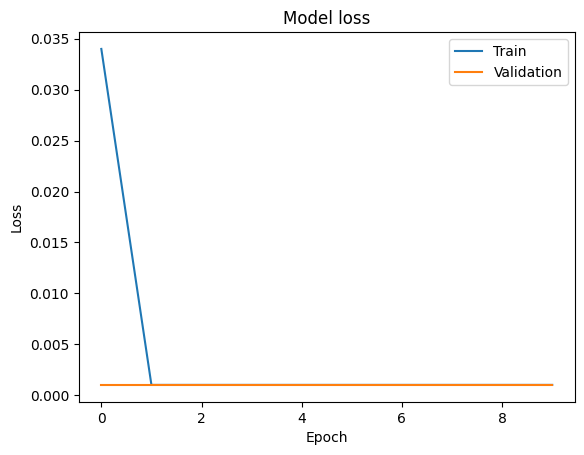

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


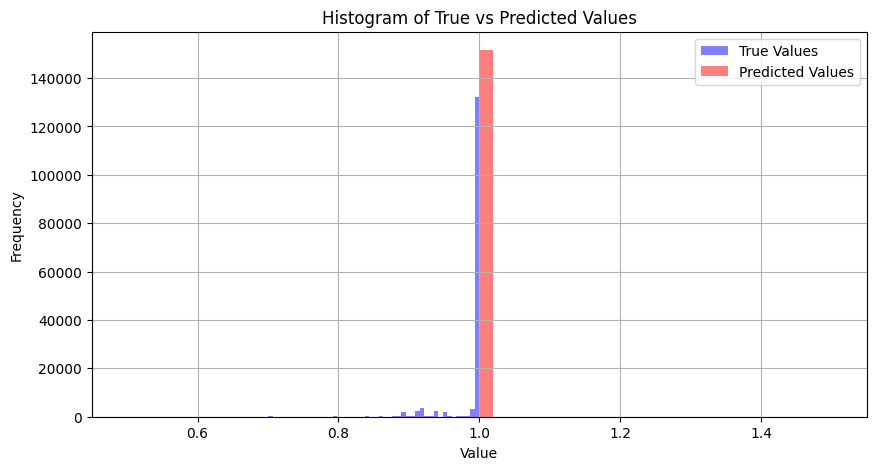

In [32]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained predictions on the validation set
y_pred = model.predict(X_val)

# Flatten the arrays for histogram plotting
y_val_flat = y_val.flatten()
y_pred_flat = y_pred.flatten()

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(y_val_flat, bins=50, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_flat, bins=50, alpha=0.5, color='red', label='Predicted Values')
plt.title('Histogram of True vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
